## HW4 Image Filtering: Difference of Gaussians

The Laplacian of Gaussian (LoG) kernel can be approximated by a scaled Difference of Gaussians (DoG) kernel, cf. [B&B Book 3, Sec 7.1.1]. That is,

\begin{equation}
L_\sigma(x,y) \approx \frac{2k^2}{\sigma^2 (k^2-1)} ~( G_{k\sigma}(x,y) - G_{\sigma}(x,y) ),
\qquad
G_{\sigma} = \frac{1}{2\pi\sigma^2} e^{-(x^2+y^2)/(2\sigma^2)}
\end{equation}

ECE472: Implement an LoG kernel using skimage.filters.gaussian() and skimage.filters.laplace(). Apply to F35.gif for sigma=1.0. Repeat for the DoG kernel skimage.filters.difference_of_gaussians(). Determine determine sigma values for the Dog kernel that approximate the appearance of LoG filtering.

ECE572: Complete the ECE472 assignment only implement your own DoG kernel using the above formulae.

Detemination / Extra: By using low sigma as 1 and high sigma as 2.5 for DoG I was able to approximate a result that was extremely close to that of the LoG. When implementing larger sigmas, image gets harder to see.

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage import filters
from skimage.util import img_as_float32 as img_as_float

In [2]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [3]:
def show_imghist(I, vmin=0.0, vmax=1.0):
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    
    ax[0].imshow(I, cmap='gray', vmin=vmin, vmax=vmax)
    ax[0].set_axis_off()
    
    ax[1].hist(I.ravel(), lw=0, bins=256, range=(vmin+0.01,vmax-0.01));
    ax[1].set_xlim(vmin, vmax)
    ax[1].set_yticks([])

<class 'numpy.ndarray'>
(460, 788) float32
Data range: 0.0 to 1.0


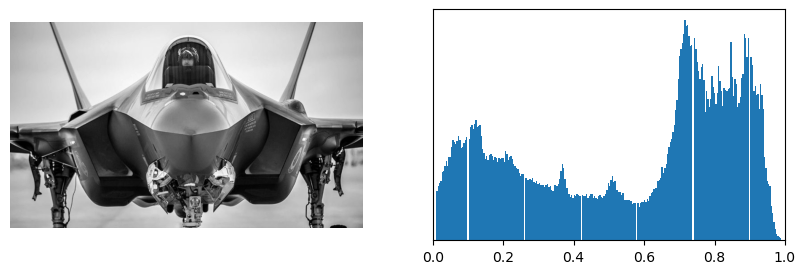

In [4]:
I1 = io.imread("../F35.gif", as_gray=True)
I1 = img_as_float(I1)
print_imginfo(I1)
show_imghist(I1)

## ECE472 Students: SKImage DoG Kernel

<class 'numpy.ndarray'>
(460, 788) float32
Data range: -0.3339176 to 0.36693633
<class 'numpy.ndarray'>
(460, 788) float32
Data range: -0.3055554 to 0.36962524


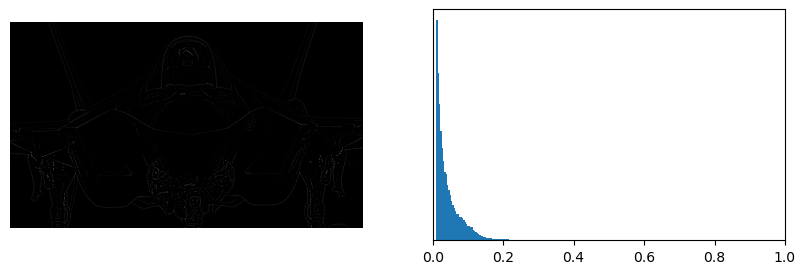

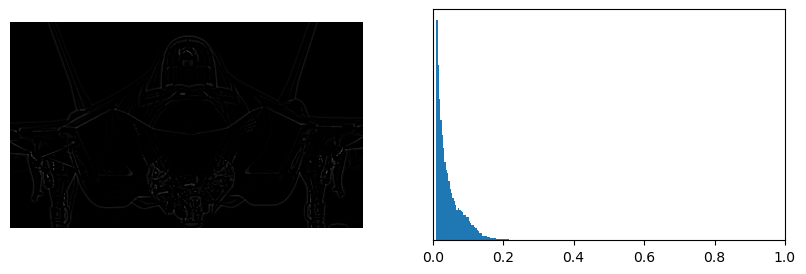

In [5]:
# Apply LoG filter using skimage.filters.gaussian() and skimage.filters.laplace()
# Apply DoG filter using skimage.filters.difference_of_gaussians()
# Show images and histograms using appropriate vmin, vmax ranges
gau = filters.gaussian(I1, sigma=1)
LoG = filters.laplace(gau)
DoG = filters.difference_of_gaussians(I1, low_sigma=1, high_sigma=2.5)
#LoG
print_imginfo(LoG)
show_imghist(LoG)
#DoG
print_imginfo(DoG)
show_imghist(DoG)


# EXTRA: For fun, try larger sigma values. Can you make interesting observations?

## ECE572 Students:  Homebrew DoG Kernel

In [6]:
# Apply LoG filter using skimage.filters.gaussian() and skimage.filters.laplace()
# Implement and apply DoG filter based on above equations
# Show images and histograms using appropriate vmin, vmax ranges

# EXTRA: For fun, try larger sigma values. Can you make interesting observations?